<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
from sklearn.utils import shuffle

try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')
    
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [38]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


В колонке `Tenure` есть пропуски, они могут повлиять на результаты. Это довольно существенная часть данных, поэтому удалять - плохое решение. Заполним медианой.

In [39]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [40]:
df['Tenure'].fillna(-1, inplace=True)
df['Tenure'] = df['Tenure'].astype(object)
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure              object
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Исследование задачи

У нас задача классификации. Принадлежность к категории модель вычисляет по формуле, состоящей из признаков. Они могут быть только численные. Признаки `RowNumber`, `CustomerId`, `Surname` вряд ли будут иметь влияние на прогнозирование, т.к. являются уникальными. А признаки `Geography`, `Gender` подвергнем прямому кодированию с учетом того, чтобы избежать дамми-ловушки.

In [41]:
target = df['Exited']
features = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
features = pd.get_dummies(features, drop_first=True)


features_train, features_test, target_train, target_test = (
    train_test_split(features, target, test_size=0.2, random_state=12345)
)
features_train, features_valid, target_train, target_valid = (
    train_test_split(features_train, target_train, test_size=0.25, random_state=12345)
)

display(features.head())
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train) 

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
0,619,42,0.00,1,1,1,101348.88,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,1,0,...,0,1,0,0,0,0,0,0,0,0


LogisticRegression(solver='liblinear')

Выполним масштабирование признаков с помощью метода стандартизации данных

In [42]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# < напишите код здесь >
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [43]:
#Подбор гиперпараметров для дерева решений
best_result = 0
best_model_decision_tree = None
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_decision_tree = model
        best_result = result
        best_depth = depth
predicted_valid = best_model_decision_tree.predict(features_valid)
print(f'Дерево решений (max_depth = {best_depth}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')
   
#Случайный лес
best_result = 0
best_est = 0
best_model_random_forest  = None
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_random_forest = model
        best_est = est
        best_result = result
predicted_valid = best_model_random_forest.predict(features_valid) 
print(f'Случайный лес (n_estimators = {best_est}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')
    
#Логистическая регрессия
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_logistic_regression.fit(features_train, target_train)
best_result = model_logistic_regression.score(features_valid, target_valid)
predicted_valid = model_logistic_regression.predict(features_valid) 
print(f'Логистическая регрессия: accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Дерево решений (max_depth = 5): accuracy = 0.8555, F1 = 0.5505443234836703
Случайный лес (n_estimators = 10): accuracy = 0.8545, F1 = 0.5205930807248765
Логистическая регрессия: accuracy = 0.8165, F1 = 0.3191094619666048


## Борьба с дисбалансом

Посмотрим, насколько у на разбалансирован целевой признак в исходном датасете и проверим модели на исходном датасете

<AxesSubplot:>

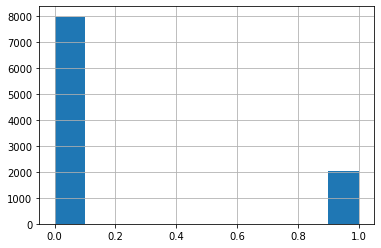

In [44]:
df['Exited'].hist()

Классы распределены неравномерно, есть смысл попробовать сделать upsampling, увеличив размерность класса 1 в 4 раза. В качестве модели возьмем Дерево решений (max_depth = 5), т.к. она показала максимальный F1 на предыдущем шаге.

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Подбор гиперпараметров и выявление лучшей модели после upsampling

In [46]:
%%time
#Подбор гиперпараметров для дерева решений
best_result = 0
best_model_decision_tree = None
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_decision_tree = model
        best_result = result
        best_depth = depth
predicted_valid = best_model_decision_tree.predict(features_valid)
print(f'Дерево решений (max_depth = {best_depth}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Дерево решений (max_depth = 5): accuracy = 0.763, F1 = 0.5502846299810247
CPU times: user 85.3 ms, sys: 0 ns, total: 85.3 ms
Wall time: 97 ms


In [47]:
%%time
#Случайный лес
best_result = 0
best_est = 0
best_model_random_forest  = None
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_random_forest = model
        best_est = est
        best_result = result
predicted_valid = best_model_random_forest.predict(features_valid) 
print(f'Случайный лес (n_estimators = {best_est}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Случайный лес (n_estimators = 10): accuracy = 0.8425, F1 = 0.5374449339207048
CPU times: user 621 ms, sys: 0 ns, total: 621 ms
Wall time: 624 ms


In [48]:
%%time    
#Логистическая регрессия
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_logistic_regression.fit(features_upsampled, target_upsampled)
best_result = model_logistic_regression.score(features_valid, target_valid)
predicted_valid = model_logistic_regression.predict(features_valid) 
print(f'Логистическая регрессия: accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Логистическая регрессия: accuracy = 0.697, F1 = 0.4656084656084656
CPU times: user 293 ms, sys: 381 ms, total: 674 ms
Wall time: 639 ms


После upsampling лучшая модель - дерево решений с гиперпараметром max_depth = 5. Построим для нее ROC-кривую

AUC-ROC after upsampling:  0.8206070711582386


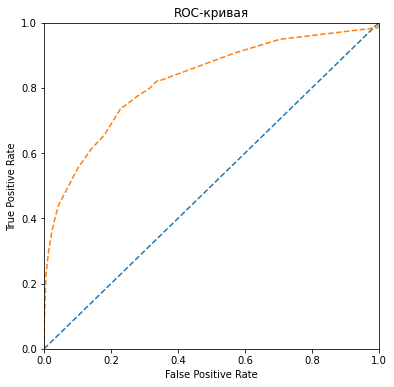

In [49]:
model = DecisionTreeClassifier(max_depth = 5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC after upsampling: ", roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds =  roc_curve(target_valid, probabilities_one_valid) # < напишите код здесь >
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Устранение дисбаланса методотом  upsampling повлияло на F1-меру в лучшую сторону. Попробуем downsampling

In [50]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Подбор гиперпараметров и выявление лучшей модели после upsampling

In [51]:
%%time
#Подбор гиперпараметров для дерева решений
best_result = 0
best_model_decision_tree = None
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_decision_tree = model
        best_result = result
        best_depth = depth
predicted_valid = best_model_decision_tree.predict(features_valid)
print(f'Дерево решений (max_depth = {best_depth}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Дерево решений (max_depth = 3): accuracy = 0.7835, F1 = 0.5118376550169109
CPU times: user 43.7 ms, sys: 3.43 ms, total: 47.1 ms
Wall time: 65.7 ms


In [52]:
%%time
#Случайный лес
best_result = 0
best_est = 0
best_model_random_forest  = None
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_downsampled, target_downsampled)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_random_forest = model
        best_est = est
        best_result = result
predicted_valid = best_model_random_forest.predict(features_valid) 
print(f'Случайный лес (n_estimators = {best_est}): accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Случайный лес (n_estimators = 6): accuracy = 0.768, F1 = 0.5274949083503055
CPU times: user 312 ms, sys: 8.81 ms, total: 321 ms
Wall time: 325 ms


In [53]:
%%time  
#Логистическая регрессия
model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_logistic_regression.fit(features_downsampled, target_downsampled)
best_result = model_logistic_regression.score(features_valid, target_valid)
predicted_valid = model_logistic_regression.predict(features_valid) 
print(f'Логистическая регрессия: accuracy = {best_result}, F1 = {f1_score(target_valid, predicted_valid)}')

Логистическая регрессия: accuracy = 0.7005, F1 = 0.4750219106047327
CPU times: user 344 ms, sys: 525 ms, total: 869 ms
Wall time: 862 ms


После downsampling лучшая модель - "случайный лес" с гиперпараметром n_estimators = 6. Построим для нее ROC-кривую

F1 after downsampling:  0.5068285280728376
AUC-ROC after downsampling:  0.7869457129732212


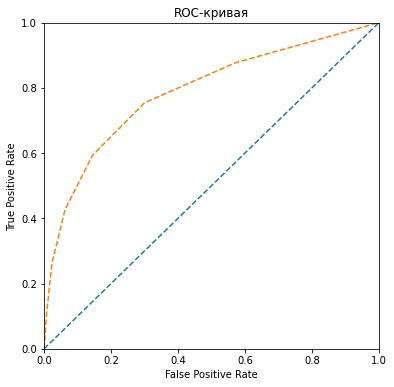

In [54]:
model = RandomForestClassifier(random_state=12345, n_estimators=6)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1 after downsampling: ", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC-ROC after downsampling: ", roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds =  roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

После downsampling F1-мера также выросла, но не так значительно, как после upsampling.

## Проверка модели
Проверим работу модели на тестовой выборке после upsampling и downsampling

Лучшая модель - "дерево решений" с гиперпараметром max_depth = 5

F1 after upsampling (test sample):  0.5874769797421732
AUC-ROC after upsampling (test sample):  0.8453148937500652


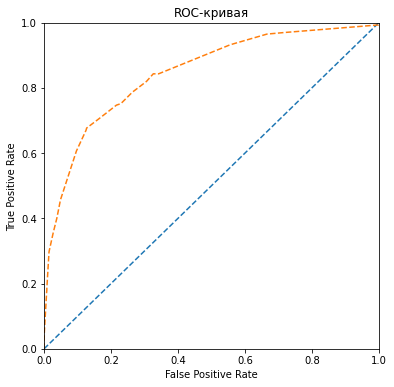

F1 after downsampling (test sample):  0.5556471558120363
AUC-ROC after downsampling (test sample):  0.8251443042799229


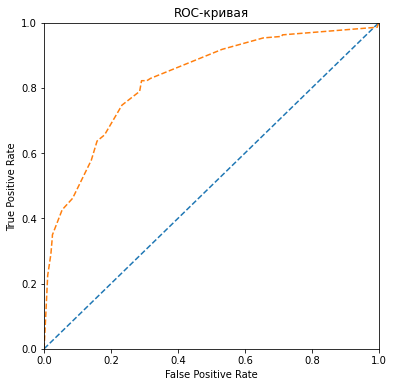

In [55]:
model = DecisionTreeClassifier(max_depth = 5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print("F1 after upsampling (test sample): ", f1_score(target_test, predicted_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("AUC-ROC after upsampling (test sample): ", roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)

print("F1 after downsampling (test sample): ", f1_score(target_test, predicted_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("AUC-ROC after downsampling (test sample): ", roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()


## Выводы
Создана наиболее оптимальная модель машинного обучения для прогноза оттока клиентов из «Бета-Банка». Проанализировано три различных алгоритма машинного обучения с различными гиперпараметрами. В итоге выбрана модель на основе алгоритма "Дерево решений" с гиперпараметром max_depth = 5. Т.к. данные для обучения несбалансированы, выбор модели происходил на основании метрики F1, также проанализирована метрика AUC-ROC. Также провена балансировка классов методами upsampling и  downsampling. Метрики итоговой модели составили:
* F1:  0.59
* AUC-ROC:  0.85